In [1]:
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [4]:
# to check outliers 
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<AxesSubplot:xlabel='height', ylabel='Count'>

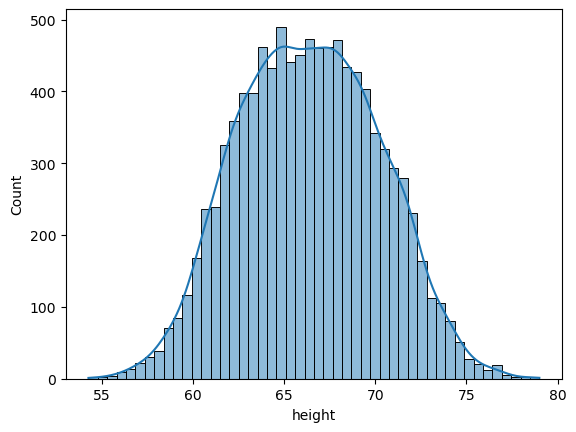

In [7]:
sn.histplot(df.height, kde= True)

In [8]:
mean= df.height.mean()
print(mean)

66.3675597548656


In [9]:
std = df.height.std()
print(std)

3.847528120795573


In [11]:
#  Formula for Outlier (-3 to +3)
print(mean- 3*std)
print(mean + 3*std)

54.824975392478876
77.91014411725232


In [12]:
# check in the data 
df [(df.height<54.8 ) | (df.height>77.91)]


,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [14]:
df_nooutlier = (df[(df.height>54.82) & (df.height<77.91)])
print(df_nooutlier)
print(df_nooutlier.shape)

      gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9993 rows x 2 columns]
(9993, 2)


# Z score


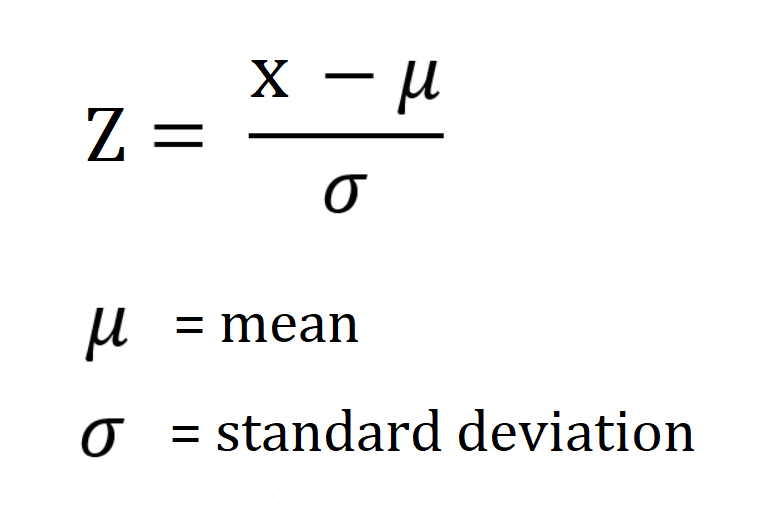

In [16]:
df['zscore'] = (df.height - df.height.mean())/ df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [17]:
# print all data point whose Zscore is greater than 3
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [18]:
df[df.zscore<3]

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [20]:
# check range 
df[(df.zscore>3) |  (df.zscore<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
# remove outliers 
df_nooutlier = df[(df.zscore<3) & (df.zscore>-3)]

In [24]:
print(df_nooutlier)

      gender     height    zscore
0       Male  73.847017  1.943964
1       Male  68.781904  0.627505
2       Male  74.110105  2.012343
3       Male  71.730978  1.393991
4       Male  69.881796  0.913375
...      ...        ...       ...
9995  Female  66.172652 -0.050658
9996  Female  67.067155  0.181830
9997  Female  63.867992 -0.649655
9998  Female  69.034243  0.693090
9999  Female  61.944246 -1.149651

[9993 rows x 3 columns]
